In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

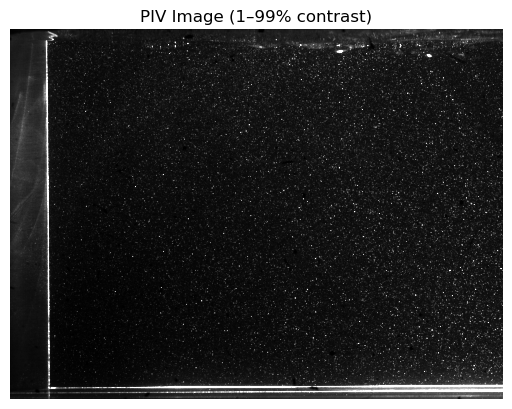

In [3]:
# View image
img = mpimg.imread("raw_image/SCC0.LA.TIF")

vmin, vmax = np.percentile(img, (1, 99))

plt.imshow(img, cmap="gray", vmin=vmin, vmax=vmax)
plt.title("PIV Image (1–99% contrast)")
plt.axis("off")
plt.show()

In [4]:
def detect_free_surface_intensity(img, visualize=False):

    # Image normalization
    if img.dtype == np.uint16:
        print(f"Using image type of {img.dtype}")
        vmin, vmax = np.percentile(img, (1, 99))
        img_normalized = np.clip(img, vmin, vmax)
        img_normalized = ((img_normalized - vmin)/ (vmax - vmin) * 255).astype(np.uint8)
    elif img.dtype == np.uint8:
        print(f"Using image type of {img.dtype}")
        img_normalized = img.copy()
    elif np.issubdtype(img.dtype, np.floating):
        print(f"Using image type of {img.dtype}")
        img_normalized = np.clip(img, 0.0, 1.0)
        img_normalized = (img_normalized * 255).astype(np.uint8)
    print(f"Image (Actual) size: max image: {img.max()}, min image: {img.min()}")
    print(f"Image (Normalized) size: max image: {img_normalized.max()}, min image: {img_normalized.min()}")

# Test
detect_free_surface_intensity(img, visualize=False)

Using image type of uint16
Image (Actual) size: max image: 4095, min image: 0
Image (Normalized) size: max image: 255, min image: 0


Using image type of uint16
Image (Actual) size: max image: 4095, min image: 0
Image (Normalized) size: max image: 255, min image: 0


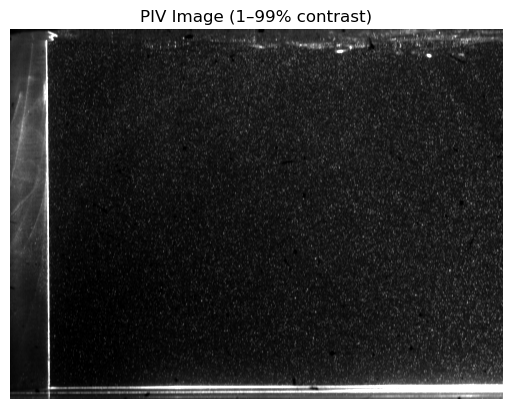

In [5]:
def detect_free_surface_intensity(img, visualize=False):

    # Image normalization
    if img.dtype == np.uint16:
        print(f"Using image type of {img.dtype}")
        vmin, vmax = np.percentile(img, (1, 99))
        img_normalized = np.clip(img, vmin, vmax)
        img_normalized = ((img_normalized - vmin)/ (vmax - vmin) * 255).astype(np.uint8)
    elif img.dtype == np.uint8:
        print(f"Using image type of {img.dtype}")
        img_normalized = img.copy()
    elif np.issubdtype(img.dtype, np.floating):
        print(f"Using image type of {img.dtype}")
        img_normalized = np.clip(img, 0.0, 1.0)
        img_normalized = (img_normalized * 255).astype(np.uint8)
    print(f"Image (Actual) size: max image: {img.max()}, min image: {img.min()}")
    print(f"Image (Normalized) size: max image: {img_normalized.max()}, min image: {img_normalized.min()}")

    # Horizontal smothing to find continous bright regions
    kernel_size = (1, 15)
    smoothed = cv2.blur(img_normalized, kernel_size)

    if visualize:
        vmin, vmax = np.percentile(smoothed, (1, 99))
        plt.imshow(smoothed, cmap="gray", vmin=vmin, vmax=vmax)
        plt.title("PIV Image (1–99% contrast)")
        plt.axis("off")
        plt.show()


# Test
detect_free_surface_intensity(img, visualize=True)

Using image type of uint16
Image (Actual) size: max image: 4095, min image: 0
Image (Normalized) size: max image: 255, min image: 0


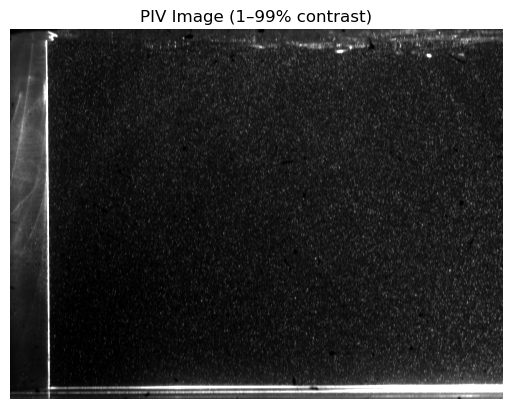

In [6]:
def detect_free_surface_intensity(img, visualize=False):

    # Image normalization
    if img.dtype == np.uint16:
        print(f"Using image type of {img.dtype}")
        vmin, vmax = np.percentile(img, (1, 99))
        img_normalized = np.clip(img, vmin, vmax)
        img_normalized = ((img_normalized - vmin)/ (vmax - vmin) * 255).astype(np.uint8)
    elif img.dtype == np.uint8:
        print(f"Using image type of {img.dtype}")
        img_normalized = img.copy()
    elif np.issubdtype(img.dtype, np.floating):
        print(f"Using image type of {img.dtype}")
        img_normalized = np.clip(img, 0.0, 1.0)
        img_normalized = (img_normalized * 255).astype(np.uint8)
    print(f"Image (Actual) size: max image: {img.max()}, min image: {img.min()}")
    print(f"Image (Normalized) size: max image: {img_normalized.max()}, min image: {img_normalized.min()}")

    # Horizontal smothing to find continous bright regions
    kernel_size = (1, 15)
    smoothed = cv2.blur(img_normalized, kernel_size)

    # Vertical smoothing
    smoothed = cv2.GaussianBlur(smoothed, (5,5), 0)

    if visualize:
        vmin, vmax = np.percentile(smoothed, (1, 99))
        plt.imshow(smoothed, cmap="gray", vmin=vmin, vmax=vmax)
        plt.title("PIV Image (1–99% contrast)")
        plt.axis("off")
        plt.show()


# Test
detect_free_surface_intensity(img, visualize=True)

Using image type of uint16
Image (Actual) size: max image: 4095, min image: 0
Image (Normalized) size: max image: 255, min image: 0
Image dimensions: (2488, 3312)


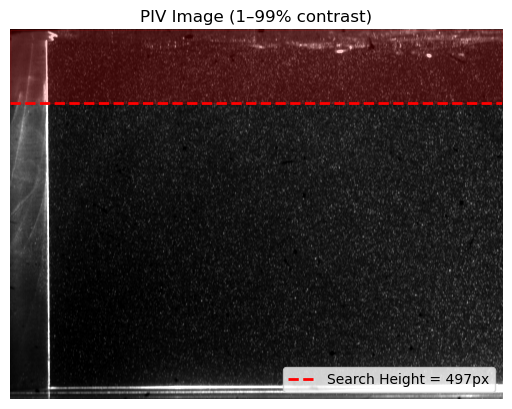

In [7]:
def detect_free_surface_intensity(img, visualize=False):

    # Image normalization
    if img.dtype == np.uint16:
        print(f"Using image type of {img.dtype}")
        vmin, vmax = np.percentile(img, (1, 99))
        img_normalized = np.clip(img, vmin, vmax)
        img_normalized = ((img_normalized - vmin)/ (vmax - vmin) * 255).astype(np.uint8)
    elif img.dtype == np.uint8:
        print(f"Using image type of {img.dtype}")
        img_normalized = img.copy()
    elif np.issubdtype(img.dtype, np.floating):
        print(f"Using image type of {img.dtype}")
        img_normalized = np.clip(img, 0.0, 1.0)
        img_normalized = (img_normalized * 255).astype(np.uint8)
    print(f"Image (Actual) size: max image: {img.max()}, min image: {img.min()}")
    print(f"Image (Normalized) size: max image: {img_normalized.max()}, min image: {img_normalized.min()}")

    print(f"Image dimensions: {img.shape}")
    height, width = img.shape[:2]

    # Horizontal smothing to find continous bright regions
    kernel_size = (1, 15)
    smoothed = cv2.blur(img_normalized, kernel_size)

    # Vertical smoothing
    smoothed = cv2.GaussianBlur(smoothed, (5,5), 0)

    # Search region
    surface_points = []
    search_height = int(height * 0.2)

    if visualize:
            vmin, vmax = np.percentile(smoothed, (1, 99))
            plt.imshow(smoothed, cmap="gray", vmin=vmin, vmax=vmax)
            plt.title("PIV Image (1–99% contrast)")
            plt.axis("off")

            plt.axhline(y=search_height, color='red', linestyle='--', linewidth=2, label=f"Search Height = {search_height}px")
            plt.fill_between(
                x=np.arange(width),
                y1=0, y2=search_height,
                color='red', alpha=0.2
            )
            plt.legend(loc="lower right")
            plt.show()

# Test
detect_free_surface_intensity(img, visualize=True)

Using image type of uint16
Image (Actual) size: max image: 4095, min image: 0
Image (Normalized) size: max image: 255, min image: 0
Image dimensions: (2488, 3312)
Using the computed points


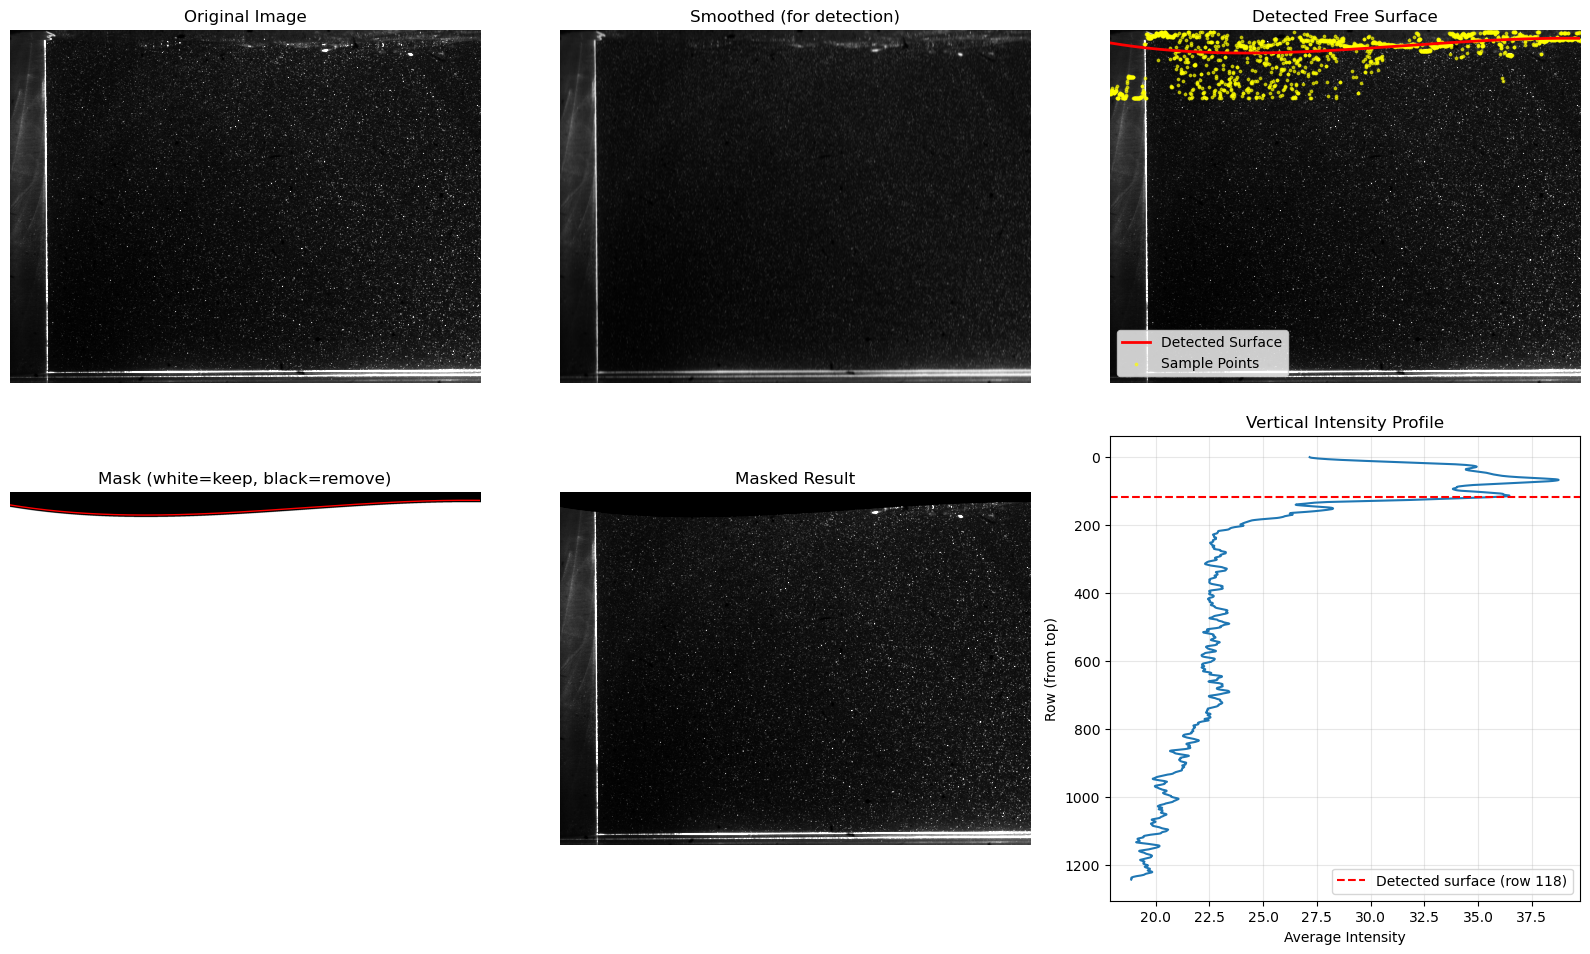

Surface detected at average row: 118.3
Surface variation (std): 36.2 pixels


In [9]:
def detect_free_surface_intensity(img, visualize=False):

    # Image normalization
    if img.dtype == np.uint16:
        print(f"Using image type of {img.dtype}")
        vmin, vmax = np.percentile(img, (1, 99))
        img_normalized = np.clip(img, vmin, vmax)
        img_normalized = ((img_normalized - vmin)/ (vmax - vmin) * 255).astype(np.uint8)
    elif img.dtype == np.uint8:
        print(f"Using image type of {img.dtype}")
        img_normalized = img.copy()
    elif np.issubdtype(img.dtype, np.floating):
        print(f"Using image type of {img.dtype}")
        img_normalized = np.clip(img, 0.0, 1.0)
        img_normalized = (img_normalized * 255).astype(np.uint8)
    print(f"Image (Actual) size: max image: {img.max()}, min image: {img.min()}")
    print(f"Image (Normalized) size: max image: {img_normalized.max()}, min image: {img_normalized.min()}")

    print(f"Image dimensions: {img.shape}")
    height, width = img.shape[:2]

    # Horizontal smothing to find continous bright regions
    kernel_size = (1, 15)
    smoothed = cv2.blur(img_normalized, kernel_size)

    # Vertical smoothing
    smoothed = cv2.GaussianBlur(smoothed, (5,5), 0)

    # Search region
    surface_points = []
    search_height = int(height * 0.2)

    for col in range(0, width, 2):
        column = smoothed[:search_height, col]
        window_size = 15
        max_avg = 0 # max average intensity
        max_pos = 0 # the position (row) it occurs

        for row in range(window_size, search_height - window_size):
            window_avg = np.mean(column[row-window_size:row+window_size]) # how bright is the window around this area
            if window_avg > max_avg:
                 max_avg = window_avg
                 max_pos = row
        
        threshold = np.percentile(column, 70) # 30% of the brightest pixels
        if max_avg > threshold:
             surface_points.append((col, max_pos)) # column and position of the maximum intensity

    if len(surface_points) < 10:
        print("Warning: Very few surface points detected")
        row_averages = np.mean(smoothed[:search_height, :], axis=1)
        surface_row = np.argmax(row_averages)

        # Create a flat horizontal line
        x_line = np.arrange(0, width)
        y_line = np.full(width, surface_row)

    else:
        print(f"Using the computed points")
        x_points = np.array([p[0] for p in surface_points]) # columns
        y_points = np.array([p[1] for p in surface_points]) # position of the various intensities

        # Outlier removal using percentile-based method
        y_median = np.median(y_points)
        y_std = np.std(y_points)

        # Points to keep (within 2 standard deviations)
        mask_inliers = np.abs(y_points - y_median) < (2 * y_std)
        x_filtered = x_points[mask_inliers]
        y_filtered = y_points[mask_inliers]

        if len(x_filtered) < 5:
            print("Not enough points. Using median...")
            y_line = np.full(width, y_median)
            x_line = np.arange(0, width)
        else:
            sort_dix = np.argsort(x_filtered)
            x_sorted = x_filtered[sort_dix]
            y_sorted = y_filtered[sort_dix]

            # Polynomial fitting
            degree = min(3, len(x_sorted) - 1)
            coeffs = np.polyfit(x_sorted, y_sorted, deg=degree)
            poly = np.poly1d(coeffs)

            x_line = np.arange(0, width)
            y_line = poly(x_line)

            # Within search region
            y_line = np.clip(y_line, 0, search_height)
    
    # Mask for the free surface
    mask = np.ones_like(img, dtype=np.uint8) * 255

    # Buffer above and below detected line
    buffer_above = 10
    buffer_below = 20

    for col in range(width):
        surface_row = int(y_line[col] if col < len(y_line) else y_line[-1])
        start_row = max(0, surface_row - buffer_above)
        end_row = min(height, surface_row + buffer_below)
        mask[:end_row, col] = 0 # Mask from top to below surface

    if visualize:
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        vmin, vmax = np.percentile(img, (1, 99))

        # Original image
        axes[0, 0].imshow(img, cmap="gray", vmin=vmin, vmax=vmax)
        axes[0, 0].set_title("Original Image")
        axes[0, 0].axis("off")

        # Smoothed image
        axes[0, 1].imshow(smoothed, cmap="gray")
        axes[0, 1].set_title("Smoothed (for detection)")
        axes[0, 1].axis("off")

        # Detected surface overlay
        axes[0, 2].imshow(img, cmap="gray", vmin=vmin, vmax=vmax)
        axes[0, 2].plot(x_line, y_line, 'r-', linewidth=2,
                        label='Detected Surface')
        if len(surface_points) > 0:
            axes[0, 2].scatter([p[0] for p in surface_points],
                               [p[1] for p in surface_points],
                               c='yellow', s=3, alpha=0.6, label='Sample Points')
        axes[0, 2].set_title("Detected Free Surface")
        axes[0, 2].legend()
        axes[0, 2].axis("off")

        # Mask
        axes[1, 0].imshow(mask, cmap="gray")
        axes[1, 0].plot(x_line, y_line, 'r-', linewidth=1)
        axes[1, 0].set_title("Mask (white=keep, black=remove)")
        axes[1, 0].axis("off")

        # Masked result
        masked_img = img.copy()
        masked_img[mask == 0] = 0
        axes[1, 1].imshow(masked_img, cmap="gray", vmin=vmin, vmax=vmax)
        axes[1, 1].set_title("Masked Result")
        axes[1, 1].axis("off")

        # Intensity profile (average per row)
        row_intensities = np.mean(smoothed[:int(height*0.5), :], axis=1)
        axes[1, 2].plot(row_intensities, range(len(row_intensities)))
        axes[1, 2].axhline(y=np.mean(y_line), color='r', linestyle='--',
                           label=f'Detected surface (row {int(np.mean(y_line))})')
        axes[1, 2].set_xlabel('Average Intensity')
        axes[1, 2].set_ylabel('Row (from top)')
        axes[1, 2].set_title('Vertical Intensity Profile')
        axes[1, 2].invert_yaxis()
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return mask, y_line

    return mask, y_line


# Test
mask, surface_line = detect_free_surface_intensity(img, visualize=True)

if mask is not None:
    print(f"Surface detected at average row: {np.mean(surface_line):.1f}")
    print(f"Surface variation (std): {np.std(surface_line):.1f} pixels")

In [ ]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation, PillowWriter

# def detect_free_surface_intensity(img, visualize=False, save_path=None):
#     # Image normalization
#     if img.dtype == np.uint16:
#         vmin, vmax = np.percentile(img, (1, 99))
#         img_normalized = np.clip(img, vmin, vmax)
#         img_normalized = ((img_normalized - vmin)/(vmax - vmin) * 255).astype(np.uint8)
#     elif img.dtype == np.uint8:
#         img_normalized = img.copy()
#     elif np.issubdtype(img.dtype, np.floating):
#         img_normalized = np.clip(img, 0.0, 1.0)
#         img_normalized = (img_normalized * 255).astype(np.uint8)

#     height, width = img.shape[:2]

#     # Smoothing
#     smoothed = cv2.blur(img_normalized, (1, 15))
#     smoothed = cv2.GaussianBlur(smoothed, (5,5), 0)

#     search_height = int(height * 0.2)
#     cols = list(range(0, width, 2))
#     points = []

#     if visualize:
#         vmin, vmax = np.percentile(smoothed, (1, 99))
#         fig, ax = plt.subplots()
#         ax.imshow(smoothed, cmap="gray", vmin=vmin, vmax=vmax)
#         ax.axhline(y=search_height, color='red', linestyle='--', linewidth=2)
#         scat = ax.scatter([], [], c='lime', s=20)
#         ax.set_title("Column-wise Search Animation")
#         ax.axis("off")

#         def update(frame):
#             col = cols[frame]
#             column = smoothed[:search_height, col]
#             window_size = 15
#             max_avg, max_pos = 0, 0
#             for row in range(window_size, search_height - window_size):
#                 window_avg = np.mean(column[row-window_size:row+window_size])
#                 if window_avg > max_avg:
#                     max_avg, max_pos = window_avg, row
#             threshold = np.percentile(column, 70)
#             if max_avg > threshold:
#                 points.append((col, max_pos))
#                 scat.set_offsets(points)
#             ax.axvline(x=col, color='yellow', linestyle=':', linewidth=1)
#             return scat,

#         anim = FuncAnimation(fig, update, frames=len(cols), interval=50, blit=False, repeat=False)

       
#         if save_path:
#             if save_path.endswith(".gif"):
#                 anim.save(save_path, writer=PillowWriter(fps=20))
#             elif save_path.endswith(".mp4"):
#                 anim.save(save_path, writer="ffmpeg", fps=20)
#             print(f"Animation saved to {save_path}")
#         else:
#             plt.show()

#         return points, search_height, anim

#     return points, search_height


# # Test
# # detect_free_surface_intensity(img, visualize=True, save_path="anim.gif")